In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#### Collect Data & Process 

In [4]:
car_dataset = pd.read_csv('car data.csv')

In [5]:
car_dataset.head()

Car_Name  Year  Selling_Price  New_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz  2014           3.35       5.59       27000    Petrol      Dealer   
1      sx4  2013           4.75       9.54       43000    Diesel      Dealer   
2     ciaz  2017           7.25       9.85        6900    Petrol      Dealer   
3  wagon r  2011           2.85       4.15        5200    Petrol      Dealer   
4    swift  2014           4.60       6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   New_Price      301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
New_Price        0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
# Convert Text columns to Numbers. 
# Fuel: Petrol = 0, Diesel = 1, CNG = 2
# Owner: Dealer = 0, Individual = 1
# Seller: Manual = 0, Automatic = 1

In [13]:
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [14]:
car_dataset.head()

Car_Name  Year  Selling_Price  New_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35       5.59       27000          0   
1      sx4  2013           4.75       9.54       43000          1   
2     ciaz  2017           7.25       9.85        6900          0   
3  wagon r  2011           2.85       4.15        5200          0   
4    swift  2014           4.60       6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

#### Splitting the data and the target (Selling Price)

In [18]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

#### Splitting the Training & Test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,  random_state = 2)

#### Model Training 

In [22]:
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

#### Evaluate Model

In [24]:
# predict training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8799451660493698


#### Visualize actual prices vs predicted prices

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#### Check test data

In [27]:
test_data = lin_reg_model.predict(X_test)

In [28]:
error_score = metrics.r2_score(Y_test, test_data)
print(error_score)

0.8365766715026903


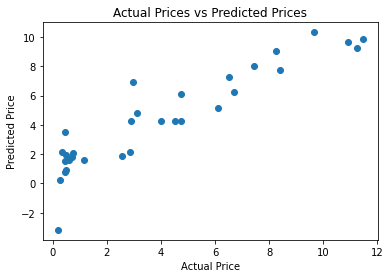

In [29]:
plt.scatter(Y_test, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#### Predict Values

In [44]:
data = {'Year': [2017], 'New_Price': [9.90], 'Kms_Driven': [8000], 'Fuel_Type': [0], 'Seller_Type': [0], 'Transmission':[0], 'Owner': [0]}

df = pd.DataFrame(data)  

print(lin_reg_model.predict(df))

[7.08610232]
